In [25]:
import numpy as np
import scipy.stats as sps
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt
import sys
%matplotlib inline

In [6]:
sample = []
with open('48.txt', 'r+') as f:
    for line in f.readlines():
        sample.append(float(line))
sample = pd.Series(sample)

In [7]:
len(sample)

1000

In [8]:
sample.describe()

count     1000.000000
mean       164.405616
std       1699.319514
min          1.003000
25%          1.692250
50%          3.741000
75%         12.780250
max      41394.891000
dtype: float64

Посмотрев на среднее, видно, что параметр распределения Парето <= 1 из свойств данного распределения

Для построения доверительного интервала для параметра $\alpha$, воспользуемся методом центральной статистики, то есть попробуем подобрать такую статистику, чье распределение не зависит от $\alpha$. Есть факт, что если у нас есть случайная величина, распределенная по $\xi \sim Pareto(\alpha, x_m)$, то $ln(\xi) \sim exp(\alpha)$. Это просто проверить. Далее, мы знаем, что $exp(\alpha) \sim \Gamma(1, \alpha)$. Так же мы знаем, что $\chi^2$ распределение с 2n степенями свободы является так же $\Gamma(n, \frac{1}{2})$. А при суммировании n независимых случайных величин, распределенных как $\Gamma(1, \alpha)$, мы получим с.в., распределенную как $\Gamma(n,\alpha)$. Если у нас есть некая константа  $c > 0$ (у нас она удовлетворяет этому), то $c \cdot \Gamma(\alpha, \theta) \sim \Gamma(\alpha, \frac{\theta}{c})$ То есть, чтобы из $\Gamma(n,\alpha)$ сделать $\Gamma(n, \frac{1}{2})$, нужно домножить это на $2\cdot \alpha$. Тогда получим  $\chi^2$ распределение с 2n степенями свободы, не зависящее от $\alpha$. Супер!

То есть в кач-ве центральной статистики берем $2\alpha \cdot n \cdot \overline{ln(X)}$
Ну а точным доверительным интервалом будет следующая пара статистик:
$$ P \left( \frac{ z_{_{\frac{1 - \gamma}{2}}} }{2n\overline{ln(X)}} \leq \alpha \leq  \frac{ z_{_{\frac{1 + \gamma}{2}}} }{2n\overline{ln(X)}} \right) = \gamma$$

Где $Z_u$ - квантиль распределения Хи-квадрат с 2n степенями свободы уровня u


Ну а теперь приступим непосредственно к построению и отрисовке 


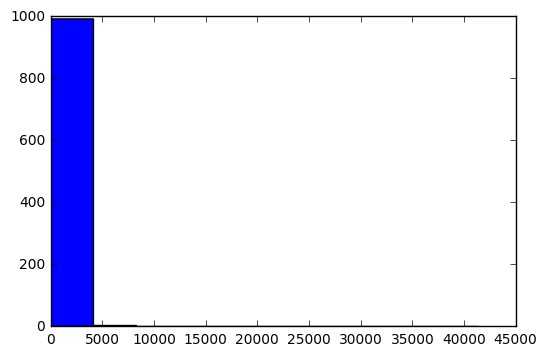

In [43]:
plt.hist(sample)
plt.show()

In [23]:
gamma = 0.95
cumsumed_ln_of_sample = np.cumsum(np.log(sample))
confints = []
for n in tqdm(range(1, sample.size + 1)):
    first_quantile = sps.chi2.ppf((1 - gamma) / 2, 2 * n)
    second_quantile = sps.chi2.ppf((1 + gamma) / 2, 2 * n)
    (left, right) = (first_quantile / (2 * cumsumed_ln_of_sample[n - 1]), second_quantile / (2 * cumsumed_ln_of_sample[n - 1]))
    confints.append((left, right))

100%|██████████| 1000/1000 [00:00<00:00, 2341.22it/s]


In [26]:
confints = np.array(confints)

In [31]:
confints[-1]

array([ 0.52119822,  0.58999844])

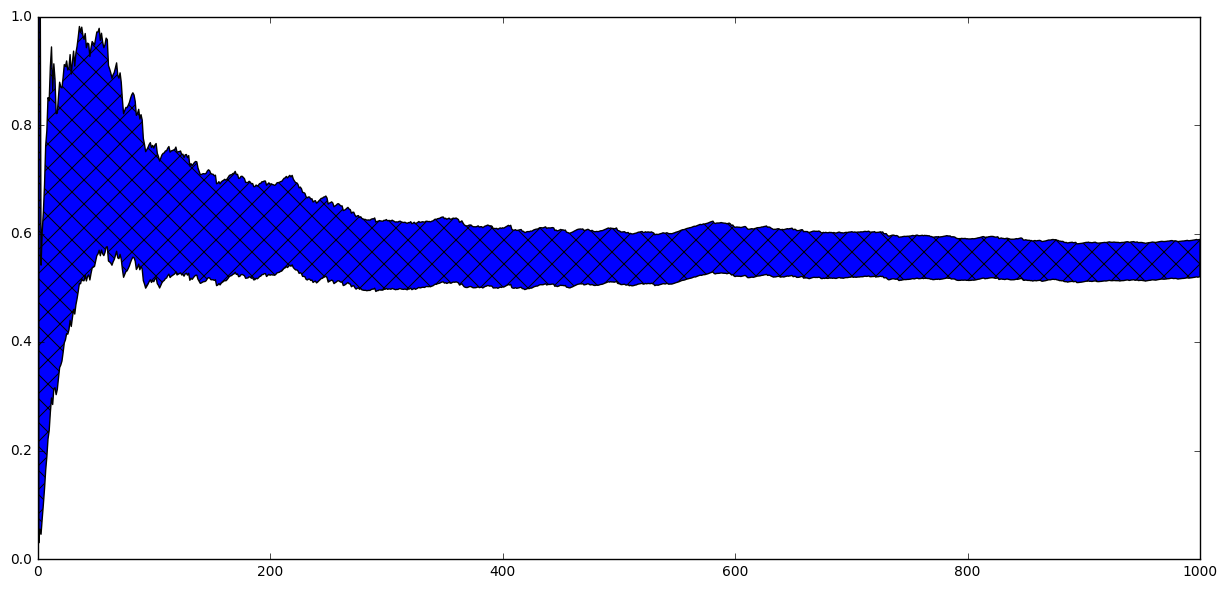

In [33]:
plt.figure(figsize=(15,7))
plt.fill_between(range(1, sample.size + 1), confints[:,0], confints[:,1], antialiased=True, hatch='x')
plt.ylim(0, 1)
plt.show()

In [46]:
print("Доверительный интервал на всей выборке", confints[-1])

Доверительный интервал на всей выборке [ 0.52119822  0.58999844]


При росте размера выборки интервал становится более узким, и начиная с 400 уже не сильно изменяет длину. Сам же интервал довольно точно оценивает параметр, несмотря на небольшой(1000) размер выборки.  [ 0.52119822  0.58999844], всего 7 сотых его длина